# `SanUnit` (advanced) <a class="anchor" id="top"></a>

- **Prepared by:**
    
    - [Yalin Li](https://qsdsan.readthedocs.io/en/latest/authors/Yalin_Li.html)

- **Covered topics:**

    - [1. Python class creation 101](#s1)
    - [2. Basic structure of SanUnit subclasses](#s2)
    - [3. Making a simple AerobicReactor](#s3)
    - [4. Other convenient features](#s4)
    
- **Video demo:**

    - [Hannah Lohman](https://qsdsan.readthedocs.io/en/latest/authors/Hannah_Lohman.html)
    
To run tutorials in your browser, go to this [Binder page](https://mybinder.org/v2/gh/QSD-Group/QSDsan/main?filepath=%2Fdocs%2Fsource%2Ftutorials).

You can also watch a video demo on [YouTube](https://youtu.be/G20J2U8g7Dg) (subscriptions & likes appreciated!).

In [1]:
import qsdsan as qs
print(f'This tutorial was made with qsdsan v{qs.__version__}.')

This tutorial was made with qsdsan v0.3.7.


## 1. Python class creation 101 <a class="anchor" id="s1"></a>

### 1.1. Syntax and methods

In [2]:
# To make a new class, at the bare minimum, you just need to have
class i_am_a_new_class:
    pass

In [3]:
# Then you can make instances of the class
instance1 = i_am_a_new_class()
type(instance1)

__main__.i_am_a_new_class

In [4]:
# To make this class more useful, we can add data and functions to the class
class i_am_a_useful_class:
    def do_something(self):
        print("Thinking of what to do...")

In [5]:
instance2 = i_am_a_useful_class()
type(instance2)

__main__.i_am_a_useful_class

In [6]:
# Since we included a function to go with this class, we can at least do
instance2.do_something()

Thinking of what to do...


OK, it can do something!

The `do_something` function, when it's associated with the `i_am_a_useful_class`, it is called a `method`. More specifically, when it's just written as:

```python
def FUNCTION_NAME(self):
    SOME CODES
```

It is a `instance method`. This means it works on instances of the class (like `instance2`). The most salient feature is that it requires `self` as a method argument (you will know from later part of the tutorial how usefuel `self` is).

In [7]:
# Of course, there can be other types of methods
class i_am_a_more_useful_class:
    @staticmethod
    def i_dont_need_self_cls():
        print('I am a static method, I can be called without `self` nor `cls`!')
        
    @classmethod
    def i_need_cls(cls):
        print(f'I am a class method, I need `cls` and the name of the class is {cls.__name__}.')
        
    def i_need_self(self):
        print('I am an instance method, I need `self`, '
              f'the name of my class is {type(self).__name__}.')
        
    @staticmethod
    def print_cls(object):
        print(f'The class of this object is {type(object).__name__}')
        
        
instance3 = i_am_a_more_useful_class() # oh boy the name is so long...

In [8]:
# You will find that the `static method`, being indicated by the `decorator` (that `@`) `staticmethod`,
# does not require `self` as the input!
# `static method` can be useful if there is a function that you want to use with the class,
# but it does not need the `self` as an argument
instance3.i_dont_need_self_cls()

I am a static method, I can be called without `self` nor `cls`!


**Minor tip:**

`decorator` is an elegant and convinent way to add functionalities, for more details, just search for it, I personally like this [tutorial](https://www.programiz.com/python-programming/decorator)

In [9]:
instance3.i_need_self()

I am an instance method, I need `self`, the name of my class is i_am_a_more_useful_class.


In [10]:
# For the `class method`, you will notice that it requires `cls` instead of `self` as an argument
# it can work on both the class and the instance
# This method is indeed helpful, since sometimes you'll want to figure out the name of a class
instance3.i_need_cls()
i_am_a_more_useful_class.i_need_cls()

I am a class method, I need `cls` and the name of the class is i_am_a_more_useful_class.
I am a class method, I need `cls` and the name of the class is i_am_a_more_useful_class.


In [11]:
# One interesting to note, is that instance and class methods are `bound methods`
# (i.e., they are bound to this instance/class)
print(instance3.i_need_cls) # see the printout, this belongs to the class
print(instance3.i_need_self) # see the printout, this belongs to the object

<bound method i_am_a_more_useful_class.i_need_cls of <class '__main__.i_am_a_more_useful_class'>>
<bound method i_am_a_more_useful_class.i_need_self of <__main__.i_am_a_more_useful_class object at 0x7fd676d53d30>>


In [12]:
# If you recall how we load the default components
cmps = qs.Components.load_default()
qs.Components.load_default # aha!

<bound method Components.load_default of <class 'qsdsan._components.Components'>>

In [13]:
# But static method is not, it's static regardless of the instance/class,
# it can be used regardless of whether an object belongs to this class or not
print(instance3.print_cls)
i_am_five = 5
print(f'The class of this object is {type(i_am_five).__name__}')
instance3.print_cls(i_am_five)
i_am_a_more_useful_class.print_cls(i_am_five)

<function i_am_a_more_useful_class.print_cls at 0x7fd676d49a60>
The class of this object is int
The class of this object is int
The class of this object is int


Fancinating, isn't it?

### 1.2. Attributes and properties
So we talked about how we can add methods to a class, then what if we want the class to remember some data?

In [14]:
# Let's see this example (yeah I just love apple...)
class apple:
    def __init__(self, argument_name, argument_color):
        self.attribute_name = argument_name
        self.attribute_color = argument_color
        
    def introduce(self):
        print(f'My name is {self.attribute_name}, my color is {self.attribute_color}.')
        
gala = apple(argument_name='Gala', argument_color='red')
granny_smith = apple(argument_name='Granny Smith', argument_color='green')
pink_lady = apple(argument_name='Pink Lady', argument_color='pink')

for i in (gala, granny_smith, pink_lady):
    i.introduce()

My name is Gala, my color is red.
My name is Granny Smith, my color is green.
My name is Pink Lady, my color is pink.


Here we use an `__init__` method, which is a builtin method and is called when you initialize (e.g., when you do `instance = class()`) an instance.

In `__init__`, with `self.attribute_name = argument_name`, we actually did two things:
- We added an attribute called `attribute_name` to `self` (i.e., the instance)
- We pass the value of the argument `argument_name` to `attribute_name`

You can think of it as anything that after the `.` of a class/instance. Attributes can be data, method, even modules.

Similar to instance vs. class method, there are instance attribute and class attribute. For example

In [15]:
class apple2(apple):
    cls_attr = 'fruit'
    
    def __init__(self, argument_name, argument_color):
        self.attribute_name = argument_name
        self.attribute_color = argument_color

In [16]:
# See that `(apple)` after `apple2`? This means we are making `apple2` a subclass of `apple`.
# Even without defining the `introduce` method, we can use it
red_delicious = apple2('Red Delicious', 'red')
red_delicious.introduce()

My name is Red Delicious, my color is red.


In [17]:
# Indeed the method is coming from `apple`
print(red_delicious.introduce)

<bound method apple.introduce of <__main__.apple2 object at 0x7fd668906a60>>


In [18]:
# The `cls_attr` there is a class attribute and can be accesible to the class and all its instances
print(red_delicious.cls_attr)
print(apple2.cls_attr)

fruit
fruit


Another concept that you might have heard of property and get confused about the differences between it and attribute.

You can think property as a special kind of attribute. Its specialty lies in the need for `getter`, `setter`, and `deleter` (functions to get values, set values, and delete values). For example

In [19]:
class apple3:
    def __init__(self, argument_name, argument_color):
        self.attribute_name = argument_name
        self._attribute_color = argument_color
        
    def introduce(self):
        print(f'My name is {self.attribute_name}, my color is {self.attribute_color}.')
        
    @property # decorator!
    def attribute_color(self):
        return self._attribute_color
    @attribute_color.setter
    def attribute_color(self, color):
        self._attribute_color = color

scarlet_gala = apple3('Scarlet Gala', 'scalet')
scarlet_gala.introduce()

My name is Scarlet Gala, my color is scalet.


In [20]:
apple3.attribute_color

You can see that `attribute_color` is a property. Since it's value depends on the attribute `_attribute_color`, and Python doesn't know the value of it before you create the instance, so you cannot get the acutal value.

In [21]:
# Note that you'll get an error if you attempt to do the following,
# because `_attribute_color` is an instance attribute
# apple3._attribute_color

However, why do we want to use property and add all those extra lines?

First, because now `getter` is a function, we can add in other thing while we try to get the value, like

In [22]:
class apple4:
    def __init__(self, argument_name, argument_color):
        self.attribute_name = argument_name
        self._attribute_color = argument_color
        
    def introduce(self):
        print(f'My name is {self.attribute_name}, my color is {self.attribute_color}.')
        
    @property # decorator!
    def attribute_color(self):
        print('Trying to retrieving the value...')
        return self._attribute_color
    @attribute_color.setter
    def attribute_color(self, color):
        self._attribute_color = color

empire = apple4('Empire', 'red')
empire.introduce()

Trying to retrieving the value...
My name is Empire, my color is red.


Second, we can prevent the users from (accidentally) changing values

In [23]:
# Say that some user try to do
empire.attribute_color = 'green'
empire.introduce()

Trying to retrieving the value...
My name is Empire, my color is green.


But this is not right! [Empire](https://en.wikipedia.org/wiki/Empire_(apple)) is NOT green!

To prevent the value of an attribute to be changed by the user, we can just take away (or more accurately, not implement) the `setter`.

In [24]:
class apple5:
    def __init__(self, argument_name, argument_color):
        self.attribute_name = argument_name
        self._attribute_color = argument_color
        
    def introduce(self):
        print(f'My name is {self.attribute_name}, my color is {self.attribute_color}.')
        
    @property
    def attribute_color(self):
        return self._attribute_color
    # Take out the `setter` function will prevent the property `attribute_color`
    # from being updated
    # @attribute_color.setter
    # def attribute_color(self, color):
    #    self._attribute_color = color

golden_delicious = apple5('Golden Delicious', 'golden')
golden_delicious.introduce()

My name is Golden Delicious, my color is golden.


In [25]:
# Now you will get an error if you try to change the color
# golden_delicious.attribute_color = 'green'

In [26]:
# However, if you really want to update the value, you can still do it by
golden_delicious._attribute_color = 'green'
print(f'The property `attribute_color` is {golden_delicious.attribute_color}.')
print(f'The attribute `_attribute_color` is {golden_delicious._attribute_color}.')

The property `attribute_color` is green.
The attribute `_attribute_color` is green.


In [27]:
# You can make it more helpful (or hurtful) by adding questions
class apple6:
    def __init__(self, argument_name, argument_color):
        self.attribute_name = argument_name
        self._attribute_color = argument_color
        
    def introduce(self):
        print(f'My name is {self.attribute_name}, my color is {self.attribute_color}.')
        
    @property
    def attribute_color(self):
        return self._attribute_color
    @attribute_color.setter
    def attribute_color(self, color):
        raise AttributeError("Nope I'm not letting you change the color!")

cosmic_crisp = apple6('Cosmic Crisp', 'dark red')
cosmic_crisp.introduce()

My name is Cosmic Crisp, my color is dark red.


In [28]:
# Ah, it hurts, doesn't it?
# cosmic_crisp.attribute_color = 'red'

[Back to top](#top)

## 2. Basic structure of `SanUnit` subclasses <a class="anchor" id="s2"></a>
Alright, equipped with the basics on `SanUnit` (assuming you are familiar with the topics covered in the [previous tutorial](https://qsdsan.readthedocs.io/en/latest/tutorials/4_SanUnit_basic.html) on `SanUnit`) and the syntax of creating Pythong classes, we can now learn more specifics about creating subclasses of `SanUnit`.

### 2.1. Fundamental methods
In addition to the `__init__` method for initialization, all `SanUnit` objects have three most fundamental methods (they all start with `_`, as users typically don't interact with them):

- `_run`, which is used for mass and energy calculation within a unit operation (e.g., if you have an anaerobic reactor that will convert 80% of the organics in the influent, you'll want to put it in `_run`

    - There is also a `run` method that will call the `_run` method and any `specification` functions you define, but we will skip it for now
    
- `_design`, this method will be called after `_run` (when you have a `System` with multiple units, then `_design` will only be called *after* all units within the system have converged). The `_design` method contains algorithms that are used in designing the unit (e.g., volume, dimensions, materials)
    
    - Material inventories calculated in `_design` are usually stored in the `design_results` dict of the unit with keys being names (`str`) of the item and values being quantities of the item
    - All entires in the `design_results` dict should have corresponding entries in the `_units` dict to provide units of measure to the values in the `design_results` dict

- `_cost`, which will be called after `_design` to get the cost of the unit, it may leverage the inventories calculated in `_run` or `_design`

    - Purchase cost of the inventory items are usually stored in the `baseline_purhcase_costs` dict, and installed cost of this item will be calcualted using different factors (`F_BM`, `F_D`, `F_P`, and `F_M` for bare module, design, pressure, and material factors, they are all dict).
    - Only the bare module factor `F_BM` is mandatory (others will be defaulted to 1 if not given). If you want to assume all material inventory items' purchase costs equal installed costs, you can set `F_BM_default` to 1 when you initialize the subclass

These methods will be aggregated into a `simulate` function that will call these methods (and do some other minor stuff).

**Note:**

You do NOT need to use all of these methods, and you do not need to strictly follow the functionalities above. For 
example, you can put cost algorithms in `_design` or even `_run`, but the latter will be strongly discouraged unless you have a good reason, as the cost algorithms will be run a lot of times when the `System` is trying to converge, which adds unnecessary overheads.

### 2.2. Useful attributes
Some of the class attributes that you will find useful in making your subclasses:

- `_N_ins` and `_N_outs` set the number of influents and effluents of the `SanUnit`

    - If you are unsure of how many influents and/or effluents there will be (e.g., they can be dynamic for a mixer), you can instead set `_ins_size_is_fixed` and/or `_outs_size_is_fixed` to `False`
    
- `construction` and `transportation` are tuple of `Construction` and `Transportation` objects for life cycle assessment (will be covered in later tutorials)
- `purchase_cost` (float) and `purchase_costs` (dict) contain the total (without the `s`) and itemized purchase costs of this unit (i.e., `purchase_cost` is the sum of all the values in the `purchase_costs` dict). Purchase cost of an item is calculated by multiplying the value in the `baseline_purchase_cost` dict with the corresponding values in the `F_<D/P/M>` dict

    - Similarly, `installed_cost` (float) and `installed_costs` (dict) are the total and itemized *installed* costs (i.e., purchase cost multiplied by the the different corresponding factor in the `F_BM` dict)

- `F_mass_in` (float), `mass_in` (np.array containing the *mass* of each component), `z_mass_in` (np.array containing the *mass fraction* of each component)
    
    - Additionally, there are `F_mass_out`, `mass_out`, and `z_mass_out`, and the corresponding sets for molar and volume flows (e.g., `F_mol_in`/`F_vol_in`, etc.)

- `H_in`/`H_out` (changes with T) and `Hf_in`/`Hf_out` (doesn't change with T), enthalpy and enthalpy of formation of influents and effluents, respectively
    
    - There is also another attribute `Hnet` calculated as `(H_out-H_in)+(Hf_out-Hf_in)`

- `_graphics`, how the unit will be represented when you call the `diagram` function. If not given, it will be defaulted to a box

    - Note that if you make the subclasses of `Mixer`/`Splitter`/`HXutility`/`HXprocess`, the default graphics will be different because these units have their corresponding graphics
    
- `results`, a method (i.e., you need to call it by `<SanUnit>.results()` instead of just `<SanUnit>.result`) to give you a quick summary of the unit design and cost results

[Back to top](#top)

## 3. Making a simple AerobicReactor <a class="anchor" id="s3"></a>
Alright, all those descriptions are abstract enough, and there are many details that will be best covered in an example. So let's assume we want to design a *very* simple aerobic reactor that will convert 90% of the influent organics into CO2 and H2O.

In [29]:
# By convention, name of the class will be concatenated capitalized words
# (I don't need know if this is a grammerly correction expression, but I trust you can get what I meant)
# Now it is the simplest form of the AerobicReactor
class AerobicReactor1(qs.SanUnit):
    def __init__(self, ID='', ins=None, outs=(), thermo=None, init_with='WasteStream'):
        qs.SanUnit.__init__(self, ID, ins, outs, thermo, init_with)
    
    def _run(self):
        pass
    
    def _design(self):
        pass
    
    def _cost(self):
        pass

In [30]:
# The default components are indeed useful!
cmps_default = qs.Components.load_default()
kwargs = {'particle_size': 'Dissolved gas',
          'degradability': 'Undegradable',
          'organic': False}
O2 = qs.Component('O2', search_ID='O2', **kwargs)
CO2 = qs.Component('CO2', search_ID='CO2', **kwargs)
cmps = qs.Components([*cmps_default, O2, CO2])
qs.set_thermo(cmps)
cmps.show()

CompiledComponents([S_H2, S_CH4, S_CH3OH, S_Ac, S_Prop, S_F, S_U_Inf, S_U_E, C_B_Subst, C_B_BAP, C_B_UAP, C_U_Inf, X_B_Subst, X_OHO_PHA, X_GAO_PHA, X_PAO_PHA, X_GAO_Gly, X_PAO_Gly, X_OHO, X_AOO, X_NOO, X_AMO, X_PAO, X_MEOLO, X_FO, X_ACO, X_HMO, X_PRO, X_U_Inf, X_U_OHO_E, X_U_PAO_E, X_Ig_ISS, X_MgCO3, X_CaCO3, X_MAP, X_HAP, X_HDP, X_FePO4, X_AlPO4, X_AlOH, X_FeOH, X_PAO_PP_Lo, X_PAO_PP_Hi, S_NH4, S_NO2, S_NO3, S_PO4, S_K, S_Ca, S_Mg, S_CO3, S_N2, S_O2, S_CAT, S_AN, H2O, O2, CO2])


In [31]:
# Now make a fake waste stream with these components
ws = qs.WasteStream(H2O=1000, S_CH3OH=0.5, units='kg/hr')
ws.show()

WasteStream: ws1
 phase: 'l', T: 298.15 K, P: 101325 Pa
 flow (g/hr): S_CH3OH  500
              H2O      1e+06
 WasteStream-specific properties:
  pH         : 7.0
  Alkalinity : 2.5 mg/L
  COD        : 498.2 mg/L
  BOD        : 357.2 mg/L
  TC         : 124.4 mg/L
  TOC        : 124.4 mg/L
 Component concentrations (mg/L):
  S_CH3OH      498.2
  H2O          996395.7


In [32]:
U1 = AerobicReactor1(ins=ws)
U1.simulate()
U1.show()

AerobicReactor1: R1
ins...
[0] ws1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): S_CH3OH  500
                 H2O      1e+06
    WasteStream-specific properties:
     pH         : 7.0
     COD        : 498.2 mg/L
     BOD        : 357.2 mg/L
     TC         : 124.4 mg/L
     TOC        : 124.4 mg/L
outs...
[0] ws2
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0
    WasteStream-specific properties: None for empty waste streams


OK, with these simple setups, we can "sort of" see something, but without the methods above we aren't really doing anything useful, so let's try to implement those methods

In [33]:
class AerobicReactor2(qs.SanUnit):
    def __init__(self, ID='', ins=None, outs=(), thermo=None, init_with='WasteStream',
                 conversion=0.9, # default conversion to be 0.9,
                 aeration_rate=5, # assume we need 5 g/L of O2 pumped into the system
                 HRT=5, # hydraulic residence time being 5 hours
                ):
        # Some standard codes you need to include for all subclasses of `SanUnit`
        qs.SanUnit.__init__(self, ID, ins, outs, thermo, init_with)
        # These are the unique attribures of `AerobicReactor`
        self.conversion = conversion
        self.aeration_rate = aeration_rate
        self.HRT = HRT
        
        # Assume a bare module factor of 2
        self.F_BM = {'Tank': 2}

        
    # Assume we'll have two influents - the waste stream and O2,
    # as well as two effluents - treated waste stream and the generated CO2
    _N_ins = 2
    _N_outs = 2
    
    def _run(self):
        # This is equivalent to
        # inf=self.ins[0]
        # o2=self.ins[1]
        inf, o2 = self.ins
        
        eff, co2 = self.outs
        o2.phase = co2.phase = 'g'
        
        # Firstly let's calculate how much O2 we need,
        # g/L (kg/m3) * m3/hr = kg/hr
        o2_needed = self.aeration_rate * self.F_vol_in
        o2.imass['O2'] = o2_needed # `imass` in kg/hr
        
        # Mix the influent streams
        eff.mix_from(self.ins)
        
        # O2 gas turned into dissolved O2
        eff.imass['S_O2'] = eff.imass['O2']
        eff.imass['O2'] = 0
        
        # Then we will want convert the organics,
        # for demo purpose let's make it very simple,
        # assume that we know ahead of time that
        # we will only have `S_CH3OH`
        # so reaction will be
        # CH3OH + 1.5 O2 -> CO2 + 2H2O
        # with the conversion defined by the user
        x = self.conversion
        converted_meoh = x * inf.imol['S_CH3OH']
        consumed_o2 = 1.5 * converted_meoh
        generated_co2 = converted_meoh
        generated_h2o = 2 * converted_meoh
        eff.imol['S_CH3OH'] -= converted_meoh
        eff.imol['S_O2'] -= consumed_o2
        eff.imol['H2O'] += generated_h2o
        co2.imol['CO2'] = generated_co2
        # Assume 5 wt% of MeOH is turned into biomass
        eff.imass['X_OHO'] = 0.05 * inf.imass['S_CH3OH']
        
        
    # We can (or seems more straightfoward to) move this into
    # the `_design` method, but since these units won't change
    # putting it here will save some simulation time
    _units = {
        'Volume': 'm3',
        'Diameter': 'm',
        'Height': 'm',
        'Stainless steel': 'kg'
    }
    
    # As for the design, let's assume we will have a 
    # cylinder with a height-to-diameter ratio of 2:1
    def _design(self):
        D = self.design_results
        tot_vol = self.outs[0].F_vol*self.HRT
        rx_vol = tot_vol / 0.8 # assume 80% working volume
        # You can certainly do `import math; math.pi`
        dia = (2*rx_vol/3.14)**(1/3)
        D['Volume'] = rx_vol
        D['Diameter'] = dia
        D['Height'] = H = 2 * dia
        
        # Assume the tank has a thickness of 3 cm,
        # we'll need the cover, but not the bottom
        ss = 3.14*(dia**2)*H + 3.14/4*(dia**2)
        # Assume the density is 7,500 kg/m3
        D['Stainless steel'] = ss * 7500
    
    # Let's assume that the reactor is
    # made of stainless steel with a price of $3/kg
    def _cost(self):
        self.baseline_purchase_costs['Tank'] = \
            3 * self.design_results['Stainless steel']
        # Assume the electricity usage is proportional to the
        # volumetric flow rate
        self.power_utility.consumption = 0.1 * self.outs[0].F_vol
    
    
    # Now it's a proper use of property,
    # see the text enclosed in the pair of triple quotes?
    # That's the documentation (e.g., the helpful prompt
    # that will show up when users do
    # `?AerobicReactor.conversion`)
    @property
    def conversion(self):
        '''[float] Conversion of the organic matters in this reactor.'''
        return self._conversion
    @conversion.setter
    def conversion(self, i):
        if not 0 <= i <= 1:
            # Include the specific values in the error messgae
            # will often help the users (and many times you) in debugging
            raise AttributeError('`conversion` must be within [0, 1], '
                                f'the provided value {i} is outside this range.')
        self._conversion = i

In [34]:
# Let's set up this unit again
U2 = AerobicReactor2(ins=(ws.copy(), 'o2'), outs=('eff', 'co2'))

In [35]:
# Voila!
U2.simulate()
U2.results()

Aerobic Reactor2                      Units       R2
Power               Rate                 kW    0.101
                    Cost             USD/hr  0.00793
Design              Volume               m3     6.34
                    Diameter              m     1.59
                    Height                m     3.18
                    Stainless steel      kg 2.05e+05
Purchase cost       Tank                USD 6.15e+05
Total purchase cost                     USD 6.15e+05
Utility cost                         USD/hr  0.00793
Additional OPEX                      USD/hr        0

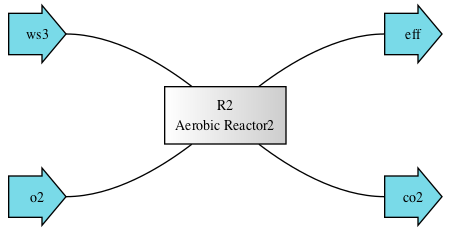

AerobicReactor2: R2
ins...
[0] ws3
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): S_CH3OH  500
                 H2O      1e+06
    WasteStream-specific properties:
     pH         : 7.0
     COD        : 498.2 mg/L
     BOD        : 357.2 mg/L
     TC         : 124.4 mg/L
     TOC        : 124.4 mg/L
[1] o2
    phase: 'g', T: 298.15 K, P: 101325 Pa
    flow (g/hr): O2  5.02e+03
    WasteStream-specific properties: None for non-liquid waste streams
outs...
[0] eff
    phase: 'l', T: 298.5 K, P: 101325 Pa
    flow (g/hr): S_CH3OH  50
                 X_OHO    25
                 S_O2     4.34e+03
                 H2O      1e+06
    WasteStream-specific properties:
     pH         : 33.4
     COD        : 74.0 mg/L
     BOD        : 49.3 mg/L
     TC         : 21.3 mg/L
     TOC        : 21.3 mg/L
     TN         : 1.7 mg/L
     TKN        : 1.7 mg/L
     TP         : 0.5 mg/L
     TK         : 0.1 mg/L
[1] co2
    phase: 'g', T: 298.15 K, P: 101325 Pa
    flow (g/hr): CO2  61

In [36]:
U2

In [37]:
# Trying to put an unrealistic value will show our helpful message
# U2.conversion = 1.1

## 4. Other convenient features <a class="anchor" id="s4"></a>
We've done a good job in making the `AerobicReactor` class, but there are many helpful features that will make our lives much easier

### 4.1. Reactions
Here's what we did for the reaction of MeOH and O2 to CO2 and H2O:
```python
converted_meoh = x * inf.imol['S_CH3OH']
consumed_o2 = 1.5 * converted_meoh
generated_co2 = converted_meoh
generated_h2o = 2 * converted_meoh
eff.imol['S_CH3OH'] -= converted_meoh
eff.imol['S_O2'] -= consumed_o2
eff.imol['H2O'] += generated_h2o
co2.imol['CO2'] = generated_co2
```

For reactions like this, we can acutally use `Reaction` in Thermosteam to do it in a much more convenient way:
```python
from thermosteam.reaction import Reaction as Rxn
#                    reaction definition             reactant    conversion
aerobic_rxn = Rxn('S_CH3OH + 1.5 O2 -> CO2 + 2 H2O', 'S_CH3OH', self.conversion)
```

If we have multiple reactions, we can use `ParallelRxn` (if all reactions happen at once) or `SeriesReaction` (if these reactions happen in sequence), and we can use `ReactionSystem` to compile multiple `Reaction`, `ParallelRxn`, and `SeriesReaction` together.

For more detailed instructions, refer to [Thermosteam's documentation](https://thermosteam.readthedocs.io/en/latest/reaction/Reaction.html).

### 4.2. `cost` decorator
If we want to scale the cost of some equipment base on certain variables (e.g., scale the capital cost and electricity of a pump based on the flow rate, we can use the `cost` decorator (usage of decorator starts with the `@` symbol, again recall the `property` decorator).

For the demo purpose, let's assume that we need a pump for the aeration that will be scaled based on the mass flow rate of needed O2
```python
from biosteam.units.decorators import cost

@cost('O2 flow rate', # the variable that the equipment is scaled on
      'O2 pump', # name of the equipment
      CE=522, # chemical engineering plant cost index (CEPCI)
      S=40000, # value of the scaling basis
      cost=22500, # cost of the equipment when the variable is at the basis value
      n=0.8, # exponential scaling factor
      kW=75, # electricity usage
      N=1, # number of this equipment (will be defaulted to 1 if not given)
      BM=2.3) # bare module
class AerobicReactor(qs.SanUnit):
    ...

    # Note that in the unit, you'll need to define what 'O2 flow rate' is
    # in the `design_results` dict and its unit in the `_units` dict
    _units = {
        ...,
        'O2 flow rate': 'kg/hr',
    }
    
    def _design(self):
        ...
        self.design_results['O2 flow rate'] = self.outs[1].F_mass
```

The scaling equations are (`ub` is the upper bound):

$$New\ cost = N \cdot cost \bigg(\frac{CE_{new}}{CE}\bigg) \bigg(\frac{S_{new}}{N \cdot S}\bigg)^{n}$$
    
$$Electricity\ rate = kW \bigg(\frac{S_{new}}{S}\bigg)$$

$$N = ceil \bigg( \frac{S_{new}}{ub} \bigg)$$

**Note:**

You can actually add the unit in the `@` expression, e.g., 
```python
@cost('O2 flow rate', ..., units='kg/hr')
```
But if later you define `_units` in the class definition by using 
```python
_units = {
    'Reactor volume': 'm3',
    'Diameter': 'm',
    'Height': 'm',
    'Stainless steel': 'kg'
}
```
You'll throw away the previous definition.

In [38]:
# If you want to know the current CEPCI
qs.CEPCI

567.5

In [39]:
# If you want to look up CEPCI by year
qs.CEPCI_by_year

{1980: 261,
 1981: 297,
 1982: 314,
 1983: 317,
 1984: 323,
 1985: 325,
 1986: 318,
 1987: 324,
 1988: 343,
 1989: 355,
 1990: 358,
 1991: 361,
 1992: 358,
 1993: 359,
 1994: 368,
 1995: 381,
 1996: 382,
 1997: 387,
 1998: 390,
 1999: 391,
 2000: 394,
 2001: 394,
 2002: 396,
 2003: 402,
 2004: 444,
 2005: 468,
 2006: 500,
 2007: 525,
 2008: 575,
 2009: 522,
 2010: 551,
 2011: 586,
 2012: 585,
 2013: 567,
 2014: 576,
 2015: 542,
 2016: 568,
 2018: 603}

For more details, check out [BioSTEAM's documentation](https://biosteam.readthedocs.io/en/latest/tutorial/Unit_decorators.html).

In [40]:
# Let's use `Reaction` and `cost` decorator here,
# I removed all the comments to make it shorter
from thermosteam.reaction import Reaction as Rxn
from biosteam.units.decorators import cost
@cost('O2 flow rate', 'O2 pump', CE=522,
      S=40000, cost=22500, n=0.8, kW=75, BM=2.3)
class AerobicReactor3(qs.SanUnit):
    def __init__(self, ID='', ins=None, outs=(), thermo=None, init_with='WasteStream',
                 conversion=0.9, aeration_rate=3, HRT=5):
        qs.SanUnit.__init__(self, ID, ins, outs, thermo, init_with)
        self.conversion = conversion
        self.aeration_rate = aeration_rate
        self.HRT = HRT
        self.F_BM = {'Tank': 2}
        self.aerobic_rxn = Rxn('S_CH3OH + 1.5 S_O2 -> CO2 + 2 H2O', 'S_CH3OH', conversion)

    _N_ins = 2
    _N_outs = 2
    
    def _run(self):
        inf, o2 = self.ins
        eff, co2 = self.outs
        o2.phase = co2.phase = 'g'
        
        o2_needed = self.aeration_rate * self.F_vol_in
        o2.imass['O2'] = o2_needed
        
        eff.mix_from(self.ins)
        eff.imass['S_O2'] = eff.imass['O2']
        eff.imass['O2'] = 0
        
        self.aerobic_rxn(eff.mol)

        eff.imass['X_OHO'] = 0.05 * inf.imass['S_CH3OH']
        eff.imass['S_CH3OH'] -= eff.imass['X_OHO']
        
    _units = {
        'Volume': 'm3',
        'Diameter': 'm',
        'Height': 'm',
        'Stainless steel': 'kg',
        'O2 flow rate': 'kg/hr'
    }
    
    def _design(self):
        D = self.design_results
        tot_vol = self.outs[0].F_vol*self.HRT
        rx_vol = tot_vol / 0.8
        dia = (2*rx_vol/3.14)**(1/3)
        D['Volume'] = rx_vol
        D['Diameter'] = dia
        D['Height'] = H = 2 * dia

        ss = 3.14*(dia**2)*H + 3.14/4*(dia**2)
        D['Stainless steel'] = ss * 7500

        D['O2 flow rate'] = self.outs[1].F_mass
    
    
    def _cost(self):
        self.baseline_purchase_costs['Tank'] = \
            3 * self.design_results['Stainless steel']
        self.power_utility.consumption = 0.1 * self.outs[0].F_vol

        
    @property
    def conversion(self):
        '''[float] Conversion of the organic matters in this reactor.'''
        return self._conversion
    @conversion.setter
    def conversion(self, i):
        if not 0 <= i <= 1:
            raise AttributeError('`conversion` must be within [0, 1], '
                                f'the provided value {i} is outside this range.')
        self._conversion = i

In [41]:
# Check out the results again
U3 = AerobicReactor3(ins=(ws.copy(), 'o2'), outs=('eff', 'co2'))
U3.simulate()
U3.results()

/Users/yalinli_cabbi/opt/anaconda3/envs/demo/lib/python3.8/site-packages/biosteam/utils/piping.py:216: RuntimeWarning: <WasteStream: o2> has been replaced in registry
  else dock(Stream(i, thermo=thermo)) for i in streams]
/Users/yalinli_cabbi/opt/anaconda3/envs/demo/lib/python3.8/site-packages/biosteam/utils/piping.py:216: RuntimeWarning: <WasteStream: eff> has been replaced in registry
  else dock(Stream(i, thermo=thermo)) for i in streams]
/Users/yalinli_cabbi/opt/anaconda3/envs/demo/lib/python3.8/site-packages/biosteam/utils/piping.py:216: RuntimeWarning: <WasteStream: co2> has been replaced in registry
  else dock(Stream(i, thermo=thermo)) for i in streams]


Aerobic Reactor3                      Units       R3
Power               Rate                 kW    0.101
                    Cost             USD/hr   0.0079
Design              Volume               m3     6.31
                    Diameter              m     1.59
                    Height                m     3.18
                    Stainless steel      kg 2.04e+05
                    O2 flow rate      kg/hr        0
Purchase cost       Tank                USD 6.13e+05
Total purchase cost                     USD 6.13e+05
Utility cost                         USD/hr   0.0079
Additional OPEX                      USD/hr        0

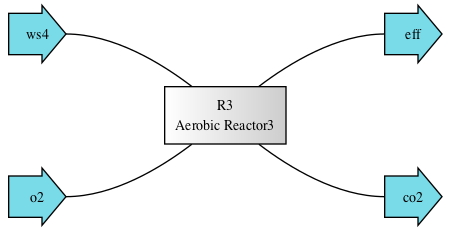

AerobicReactor3: R3
ins...
[0] ws4
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): S_CH3OH  500
                 H2O      1e+06
    WasteStream-specific properties:
     pH         : 7.0
     COD        : 498.2 mg/L
     BOD        : 357.2 mg/L
     TC         : 124.4 mg/L
     TOC        : 124.4 mg/L
[1] o2
    phase: 'g', T: 298.15 K, P: 101325 Pa
    flow (g/hr): O2  3.01e+03
    WasteStream-specific properties: None for non-liquid waste streams
outs...
[0] eff
    phase: 'l', T: 298.36 K, P: 101325 Pa
    flow (g/hr): S_CH3OH  25
                 X_OHO    25
                 S_O2     2.34e+03
                 H2O      1e+06
                 CO2      618
    WasteStream-specific properties:
     pH         : 22.9
     COD        : 49.5 mg/L
     BOD        : 31.8 mg/L
     TC         : 182.2 mg/L
     TOC        : 15.2 mg/L
     TN         : 1.7 mg/L
     TKN        : 1.7 mg/L
     TP         : 0.5 mg/L
     TK         : 0.1 mg/L
[1] co2
    phase: 'g', T: 298.15 K, P: 10

In [42]:
U3

### 4.3. `Equipment`
If you have multiple equipment that will be used in many of your units, then you might consider using the `Equipment` class. For exemplary usage, check out the [documentation](https://qsdsan.readthedocs.io/en/latest/sanunits/ElectrochemicalCell.html) of `ElecchemicalCell` and the [source codes](https://github.com/QSD-Group/QSDsan/tree/main/qsdsan/equipments) of the corresponding equipment.

[Back to top](#top)